In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import itertools
%matplotlib inline

In [2]:
directory = r"C:\Users\Paulina\Politechnika\Semestr_III\WDFCS\Projekt\zadanie_3_dane"
pliki = os.listdir(directory)
dane = [pd.read_csv(os.path.join(directory, plik), sep=r"\s*", skiprows=1, header=None, encoding='ANSI') for plik in pliki]
for i in range(len(dane)):
#     print(dane[i].columns)
    dane[i].columns = ['2theta', 'I']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\parsers.py:2138: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\parsers.py:2140: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


In [71]:
a = 8.91 # w Angstremach
Lambda = 1.66 # w Angstremach
def d_hkl(h,k,l):
    return a/np.sqrt(h**2+k**2+l**2)

# H = []
# K = []
# L = []

# for h in range(10):
#     for k in range(10):
#         for l in range(10):
#             H.append(h)
#             K.append(k)
#             L.append(l)
H,K,L = np.array(list(itertools.combinations(range(11),3))).T
tab = []
for n in [1]:
    tabelka = pd.DataFrame({'h':H,'k':K,'l':L})
    tabelka['n'] = n
    tabelka['sqrt'] = np.sqrt(tabelka.h**2+tabelka.k**2+tabelka.l**2)
    tabelka = tabelka[tabelka.sqrt < 2*a/Lambda/n]
    tabelka['d_hkl'] = d_hkl(tabelka.h,tabelka.k,tabelka.l)
    tabelka['sin_theta'] = n*Lambda/2/tabelka.d_hkl
    tabelka['2theta'] = 2*np.arcsin(tabelka.sin_theta)
    tabelka['F'] = 1+np.exp(np.pi*1j*(tabelka.h+tabelka.k+tabelka.l))
    tabelka['Widoczne'] = (np.abs(tabelka.F) > 1e-8)
    tabelka = tabelka[tabelka['2theta'] < np.pi/2]
    tab.append(tabelka)
tabela = pd.concat(tab).reset_index()
tabela

,index,h,k,l,n,sqrt,d_hkl,sin_theta,2theta,F,Widoczne
0,0,0,1,2,1,2.236068,3.984673,0.208298,0.419669,3.67394039744e-16j,False
1,1,0,1,3,1,3.162278,2.817589,0.294578,0.598028,(2-4.89858719659e-16j),True
2,2,0,1,4,1,4.123106,2.160992,0.384083,0.788428,6.12323399574e-16j,False
3,3,0,1,5,1,5.099020,1.747395,0.474993,0.989912,(2-7.34788079488e-16j),True
4,4,0,1,6,1,6.082763,1.464795,0.566632,1.204826,8.57252759403e-16j,False
5,5,0,1,7,1,7.071068,1.260064,0.658697,1.438170,(2-9.79717439318e-16j),True
6,9,0,2,3,1,3.605551,2.471189,0.335871,0.685059,6.12323399574e-16j,False
7,10,0,2,4,1,4.472136,1.992337,0.416596,0.859396,(2-7.34788079488e-16j),True
8,11,0,2,5,1,5.385165,1.654545,0.501648,1.051006,8.57252759403e-16j,False
9,12,0,2,6,1,6.324555,1.408795,0.589156,1.260028,(2-9.79717439318e-16j),True


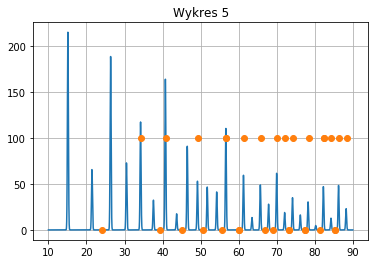

In [74]:
i = 5
plt.plot(dane[i]['2theta'],dane[i]['I']-np.min(dane[i]['I']))
plt.plot(tabela['2theta']*180/np.pi,50*np.abs(tabela.F),'o')
#     plt.ylim(0,4)
plt.grid()
plt.title(f'Wykres {i}')
plt.show()